# **Analyzing StackOverflow Develper Survey Data**
## **Data Visualization using Python using SQL Queries**

*   Connect to and query an SQLite database.

*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Connect to an SQLite Database.


In [1]:
# Download the database file
!curl -O https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  3 34.9M    3 1119k    0     0   754k      0  0:00:47  0:00:01  0:00:46  754k
 10 34.9M   10 3696k    0     0  1491k      0  0:00:24  0:00:02  0:00:22 1491k
 18 34.9M   18 6528k    0     0  1878k      0  0:00:19  0:00:03  0:00:16 1878k
 26 34.9M   26 9471k    0     0  2117k      0  0:00:16  0:00:04  0:00:12 2117k
 34 34.9M   34 12.1M    0     0  2265k      0  0:00:15  0:00:05  0:00:10 2707k
 42 34.9M   42 15.0M    0     0  2373k      0  0:00:15  0:00:06  0:00:09 2854k
 51 34.9M   51 17.9M    0     0  2459k      0  0:00:14  0:00:07  0:00:07 2939k
 60 34.9M   60 21.3M    0     0  2575k      0  0:00:13  0:00:08  0:00:05 3061k
 71 34.9M   71 24.9M    0     0  2691k      0  0:00

In [2]:
# Connect to the database

import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [3]:
# Import modules

import pandas as pd
import seaborn as sns

## Example Queries


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

pd.read_sql_query(QUERY,conn)

,COUNT(*)
0,11398


In [5]:
# Print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""

pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [6]:
# Run a group by query

QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [7]:
# Describe a table

table_name = 'EduOther'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "EduOther" (
"Respondent" INTEGER,
  "EduOther" TEXT
)


In [8]:
pd.set_option('display.max_rows', len(df))
print(df)

                                                 sql
0  CREATE TABLE "EduOther" (\n"Respondent" INTEGE...


In [9]:
# Get a list of column names in a table

QUERY = """
PRAGMA table_info(master)
"""

df = pd.read_sql_query(QUERY,conn)

pd.set_option('display.max_rows', len(df))
print(df)

    cid            name     type  notnull dflt_value  pk
0     0           index  INTEGER        0       None   0
1     1      Respondent  INTEGER        0       None   0
2     2      MainBranch     TEXT        0       None   0
3     3        Hobbyist     TEXT        0       None   0
4     4     OpenSourcer     TEXT        0       None   0
5     5      OpenSource     TEXT        0       None   0
6     6      Employment     TEXT        0       None   0
7     7         Country     TEXT        0       None   0
8     8         Student     TEXT        0       None   0
9     9         EdLevel     TEXT        0       None   0
10   10  UndergradMajor     TEXT        0       None   0
11   11         OrgSize     TEXT        0       None   0
12   12       YearsCode     TEXT        0       None   0
13   13      Age1stCode     TEXT        0       None   0
14   14    YearsCodePro     TEXT        0       None   0
15   15       CareerSat     TEXT        0       None   0
16   16          JobSat     TEX

# Visualizations


## Visualizing distribution of data


### Histograms


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

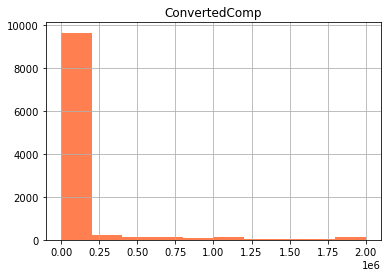

In [10]:
# Histogram of CovertedComp (annual salary in USD)
QUERY = """
SELECT ConvertedComp
FROM master
"""
converted_comp = pd.read_sql_query(QUERY,conn)
converted_comp.hist(color='coral')

The distribution of ConvertedComp (annual salary) is heavily skewed to the right.

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

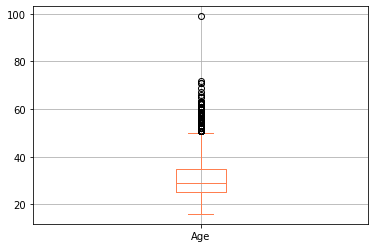

In [11]:
QUERY = """
SELECT Age
FROM master
"""
age = pd.read_sql_query(QUERY,conn)
age.boxplot(color='coral')

There are outliers above the age of 50. Data is clustered below the median, particularly in the second quartile.

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

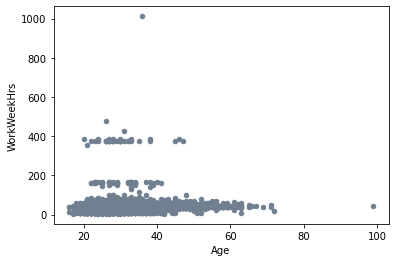

In [12]:
# Scatter plot of Age and WorkWeekHrs
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_scatter = pd.read_sql_query(QUERY,conn)

df_scatter.plot(x='Age', y='WorkWeekHrs', kind='scatter', color='slategrey')

No meaningful relationship is immediately apparent between age and hours worked in a week.

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

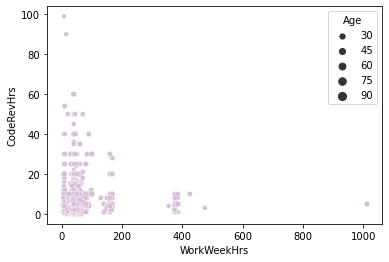

In [13]:
# WorkWeekHrs and CodeRevHrs, Age as bubble size
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df_bubble = pd.read_sql_query(QUERY,conn)

sns.scatterplot(data=df_bubble, x='WorkWeekHrs', y='CodeRevHrs', size='Age', color='thistle')

## Visualizing composition of data


### Pie Chart


<AxesSubplot:title={'center':'Database Respondents Desire to Learn Next Year'}, ylabel='count'>

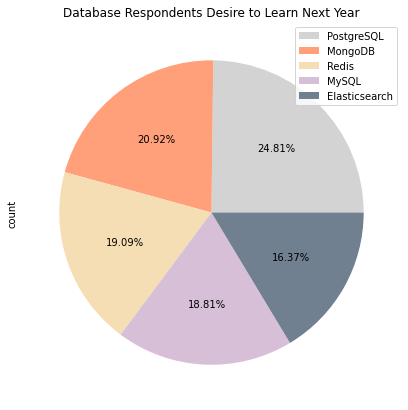

In [14]:
# Pie chart of top 5 databases respondents wish to learn next year.
QUERY = """
SELECT count(DatabaseDesireNextYear) as count, DatabaseDesireNextYear as Database
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count(DatabaseDesireNextYear) desc limit 5
"""
df_pie = pd.read_sql_query(QUERY,conn)

df_pie = df_pie.set_index('Database')

df_pie.plot(kind='pie', 
            y = 'count', 
            labels=None, 
            title = 'Database Respondents Desire to Learn Next Year', 
            figsize = (12,7), 
            autopct='%.2f%%', colors=['lightgrey', 'lightsalmon', 'wheat', 'thistle', 'slategrey'])

### Stacked Chart


<AxesSubplot:title={'center':'Comparison of Work Hours and Code Review Hours'}, xlabel='Age'>

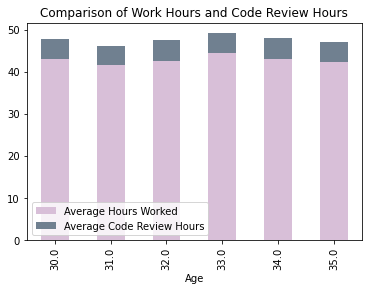

In [15]:
# Stacked bar chart of average WokrWeekHrs and average CodeRevHrs for ages 30-35

QUERY = """
SELECT Age, avg(WorkWeekHrs) as 'Average Hours Worked', avg(CodeRevHrs) as 'Average Code Review Hours'
FROM Master
WHERE Age between 30 and 35
GROUP BY Age
"""
df_stacked = pd.read_sql_query(QUERY,conn)

df_stacked.plot(kind='bar', 
                stacked=True, 
                x='Age', 
                color=['thistle', 'slategrey'], title='Comparison of Work Hours and Code Review Hours')

## Visualizing comparison of data


### Line Chart


<AxesSubplot:title={'center':'Age Compared to Salary'}, xlabel='Age', ylabel='USD'>

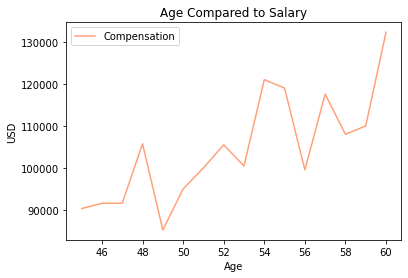

In [16]:
# Median ConvertedComp plotted for ages 45-60
QUERY = """
SELECT ConvertedComp as Compensation, Age
FROM Master
WHERE Age between 45 and 60
"""
df_line = pd.read_sql_query(QUERY,conn)

df_line.groupby(['Age']).median().plot(kind='line', 
                                       ylabel = 'USD', 
                                       color='lightsalmon', 
                                       title='Age Compared to Salary')


### Bar Chart


<AxesSubplot:ylabel='JobSeek'>

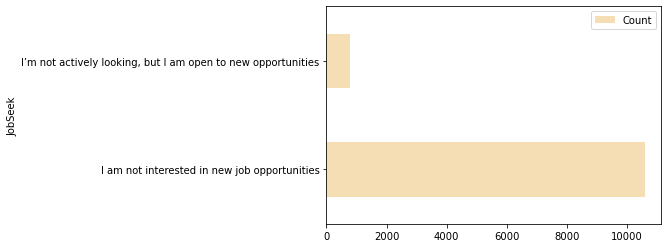

In [17]:
# Horizontal bar chart of job seek
QUERY = """
SELECT JobSeek, count(JobSeek) as Count
FROM Master
Group By MainBranch
"""
df_horizontal = pd.read_sql_query(QUERY,conn)

df_horizontal.plot.barh(x='JobSeek', color='wheat')


## Close the database connection


In [18]:
conn.close()